In [41]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns
jtplot.style()
import statsmodels.api as sm

In [42]:
df = pd.read_csv('./../data/Monsteruitslagen_Resultaten.csv')
df['datetime'] = pd.to_datetime(df.datum + ' ' + df.tijd)

def convert_tappunt(x):
    x = str(x).lower()
    if 'thermostatische douchemengkraan' in x or 'therm.' in x:
        return 'douche'
    if 'douche' in x:
        return 'douche'
    if '1e tappunt' in x:
        return '1e tappunt'
    return 'overige'

def convert_ruimte(x):
    x = str(x).lower()
    if 'kelder' in x:
        return 'kelder'
    if 'kamer' in x:
        return 'kamer'
    if 'appartement' in x:
        return 'appartement'
    if 'technische ruimte' in x:
        return 'technische ruimte'
    if 'kapsalon' in x:
        return 'kapsalon'
    return 'overige'
    
df['tappunt_simple'] = df.tappunt.apply(convert_tappunt)
df['ruimte_simple'] = df.ruimte.apply(convert_ruimte)
df['location_is_Noorderkroon'] = df.locatienaam.str.contains('Noorderkroon')

df_tmp = df[df.component == 'Totaal Legionella spp'].copy()
df_tmp.resultaat = df_tmp.resultaat.str.replace('<100', '0').astype(int)
df_tmp.resultaat.groupby(pd.qcut(df_tmp.tempvoor, 4)).describe()

def get_level(x):
    for i in [0,1,2,3,4]:
        if '{}.'.format(i) in x:
            return i
    return -1
df_tmp['resultaat_bin'] = (df_tmp.resultaat > 0).astype(int)

df_tmp['app_level'] = df_tmp.ruimte.apply(get_level)

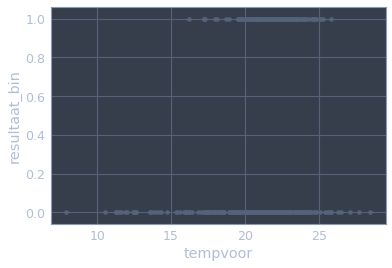

In [5]:
df_tmp.plot.scatter('tempvoor', 'resultaat_bin')

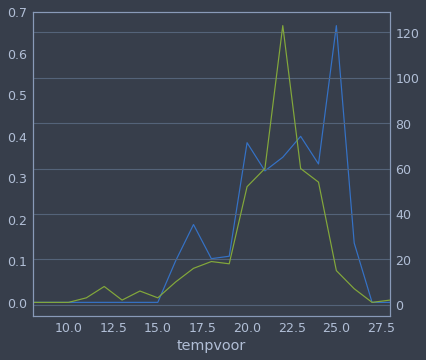

In [49]:
df_tmp[['tempvoor', 'resultaat_bin']].groupby(df_tmp.tempvoor.round()).resultaat_bin.mean().plot()
df_tmp[['tempvoor', 'resultaat_bin']].groupby(df_tmp.tempvoor.round()).resultaat_bin.count().plot(secondary_y=True)

In [54]:
df_tmp[['tempvoor', 'resultaat_bin']].groupby(df_tmp.tempvoor < 20).resultaat_bin.describe()


,count,mean,std,min,25%,50%,75%,max
tempvoor,,,,,,,,
False,356.0,0.359551,0.480544,0.0,0.0,0.0,1.0,1.0
True,105.0,0.142857,0.351605,0.0,0.0,0.0,0.0,1.0


<Figure size 1440x360 with 0 Axes>

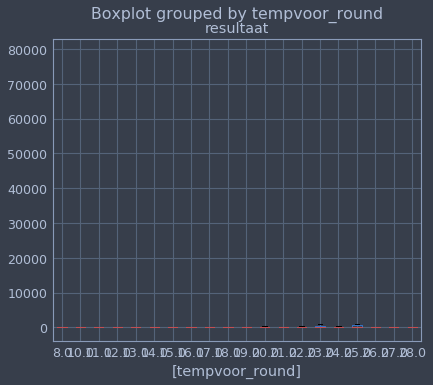

In [37]:
df_tmp['tempvoor_round'] = df_tmp['tempvoor'].round()
plt.figure(figsize=(20,5))
df_tmp.groupby('temp')


In [ ]:
df_tmp.plot.scatter('tempvoor', 'resultaat')

In [47]:
model = sm.Logit(df_tmp.resultaat > 0, (df_tmp['tempna'] > 20).astype(int))
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.680677
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                  461
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            0
Date:                Sat, 02 Nov 2019   Pseudo R-squ.:                -0.09918
Time:                        07:33:20   Log-Likelihood:                -313.79
converged:                       True   LL-Null:                       -285.48
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tempna        -0.6318      0.191     -3.308      0.001      -1.006      -0.257
==============================================================================
"""

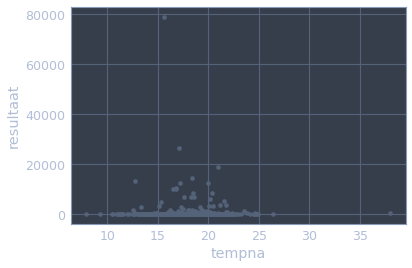

In [5]:
df_tmp.plot.scatter('tempna', 'resultaat')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


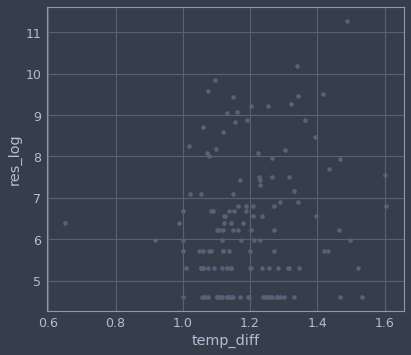

In [210]:
df_tmp['temp_diff'] = df_tmp.tempvoor / df_tmp.tempna
df_tmp['res_log'] = np.log(df_tmp.resultaat)
df_tmp.plot.scatter('temp_diff', 'res_log')